## Running DMD on ERA5 Data

To begin with, we have run Proper Orthogonal Decomposition on the ERA5 dataset on Baskerville. 

The ERA5 dataset is a global atmospheric reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF). It provides hourly estimates of a large number of atmospheric, land and oceanic climate variables from 1950 to present. The dataset is available at a resolution of 0.25 degrees.

We have subsampled ERA5 into three time series: biweekly (low frequency), daily (mid frequency), hourly (high frequency).

#### Biweekly

Sampled from January 1960 to January 2020, taking one measurement every 14 days. 

#### Daily

Sampled from 1st January 2018 to 10th January 2020, taking one measurement every day.

#### Hourly

Sampled from 1st January 2020 to 10th January 2020, taking one measurement every hour. 


### Load V Matrix

First we load the results of the v matrix from POD. [The code can be found here](https://github.com/ClimeTrend/pyLowOrder/blob/c7440392baf5dd58152dffe1a6266bdf6133818b/Examples/run_POD_surface.py). 

`PSI,S,V = pyLOM.POD.run(X,remove_mean=True)`

PSI are POD modes, S are singular values, V are time coefficients. We will use V to run DMD on the ERA5 dataset.


In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='svg'

import sys
# Add parent directory to path
sys.path.append('../src/')

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=3)



In [35]:
# Load hourly_V.npy
hourly_V = np.load('../data/POD_Results/hourly_V.npy')
print(f"hourly_V shape: {hourly_V.shape}")

# Load daily_V.npy
daily_V = np.load('../data/POD_Results/daily_V.npy')
print(f"daily_V shape: {daily_V.shape}")

# Load biweekly_V.npy
biweekly_V = np.load('../data/POD_Results/biweekly_V.npy')
print(f"biweekly_V shape: {biweekly_V.shape}")




hourly_V shape: (720, 720)
daily_V shape: (1105, 1105)
biweekly_V shape: (784, 784)


In [33]:
# Generate a time variable for each of the datasets. We know the increment for daily is 24 hours, for hourly is 1 hour, and for biweekly is 14 days.

def calculate_time_array(data, interval_hours):
    """
    Calculate the time array for the given data and time interval.

    Parameters:
    - data: numpy array of the dataset (e.g., daily_V, hourly_V, biweekly_V)
    - interval_hours: Time interval between each data point in hours (e.g., 24 for daily, 1 for hourly)

    Returns:
    - time_array: numpy array representing the time in hours
    """
    return np.arange(0, data.shape[0] * interval_hours, interval_hours)

def calculate_new_year_positions(time_array, interval_hours):
    """
    Calculate the positions of new years in the time array, only if within the time range.

    Parameters:
    - time_array: The time array of the dataset
    - interval_hours: Time interval between each data point in hours

    Returns:
    - new_year_positions: Positions of new years in the time array
    """
    new_year_positions = []
    current_year = 365 * 24  # hours in a year
    next_year_position = current_year

    while next_year_position <= time_array[-1]:
        new_year_positions.append(next_year_position)
        next_year_position += current_year
    
    return new_year_positions

# Time in hours
hourly_time = calculate_time_array(hourly_V, 1)
daily_time = calculate_time_array(daily_V, 24) 
biweekly_time = calculate_time_array(biweekly_V, 24 * 14)


# # Calculate new year positions
new_years_hourly = calculate_new_year_positions(hourly_time, 1)
new_years_daily = calculate_new_year_positions(daily_time, 24)
new_years_biweekly = calculate_new_year_positions(biweekly_time, 24 * 14)






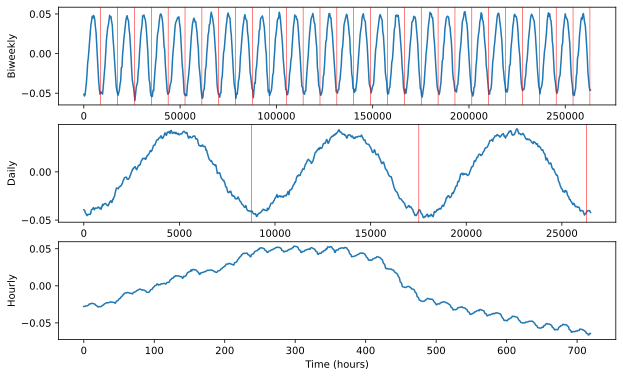

In [34]:
# Visualise the first POD mode across time
def plot_v_matrix(data, time_array, ax, label, mode=0):
    """
    Plot the time series data.

    Parameters:
    - time_array: numpy array representing the time in hours
    - data: numpy array of the dataset (e.g., daily_V, hourly_V, biweekly_V)
    - ax: matplotlib axes object to plot on
    - label: Label for the plot
    - mode: POD mode to plot
    """

    ax.plot(time_array, data[mode, :])
    ax.set_ylabel(label)
    ax.set_xlabel('Time (hours)')

def plot_new_year_lines(time_array, ax, label, new_year_positions):
    """
    Plot the time series data and add vertical lines for new years.

    Parameters:
    - time_array: numpy array representing the time in hours
    - data: numpy array of the dataset (e.g., daily_V, hourly_V, biweekly_V)
    - ax: matplotlib axes object to plot on
    - label: Label for the plot
    - new_year_positions: Positions of new years in the time array
    """
    for new_year in new_year_positions:
        if new_year <= time_array[-1]:  # Only plot within the range of the data
            ax.axvline(new_year, color='red', linestyle='-', linewidth=0.5)
    ax.set_ylabel(label)


# Plot the data
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

plot_v_matrix(biweekly_V, biweekly_time, ax[0], 'Biweekly')
plot_new_year_lines(biweekly_time, ax[0], 'Biweekly', new_years_biweekly)

plot_v_matrix(daily_V, daily_time, ax[1], 'Daily')
plot_new_year_lines(daily_time, ax[1], 'Daily', new_years_daily)

plot_v_matrix(hourly_V, hourly_time, ax[2], 'Hourly')
plot_new_year_lines(hourly_time, ax[2], 'Hourly', new_years_hourly)
